In [8]:
import os
os.getcwd()

'c:\\Users\\Pratibha\\OneDrive\\Desktop\\DATA SCIENCE RESOURCES\\revenue-forecasting-scenario-planning\\revenue-forecasting-scenario-planning\\notebooks'

In [12]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Pratibha\OneDrive\Desktop\DATA SCIENCE RESOURCES\revenue-forecasting-scenario-planning\revenue-forecasting-scenario-planning\data\processed\monthly_revenue_processed_ALL_YEARS_CORRECT.csv")

df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df = df.sort_values("Date").reset_index(drop=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     341 non-null    datetime64[ns]
 1   Revenue  341 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.5 KB


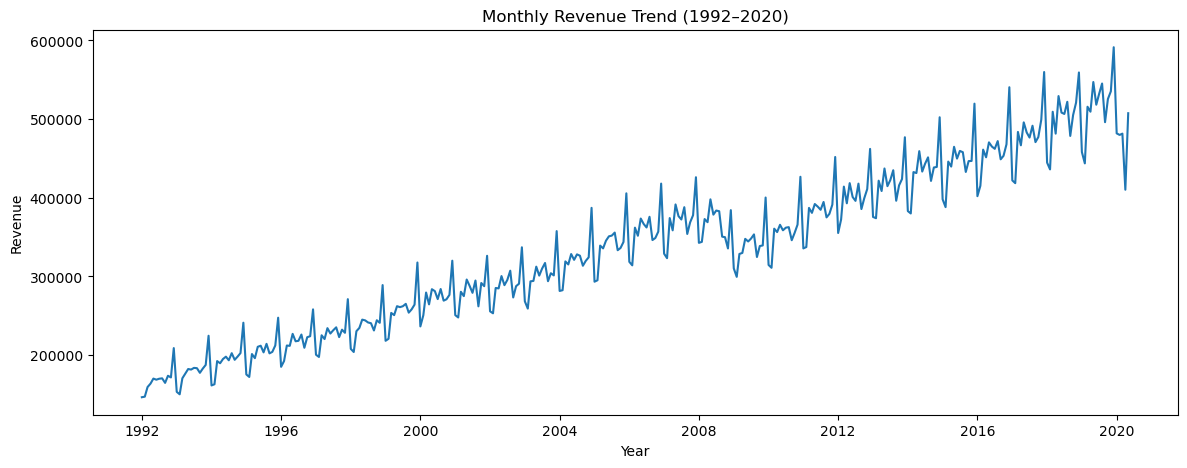

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(df["Date"], df["Revenue"])
plt.title("Monthly Revenue Trend (1992–2020)")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.show()


#### A structural break = behavior of revenue changes permanently.

### Seasonality analysis

In [13]:
df["Month"] = df["Date"].dt.month


<Figure size 1200x500 with 0 Axes>

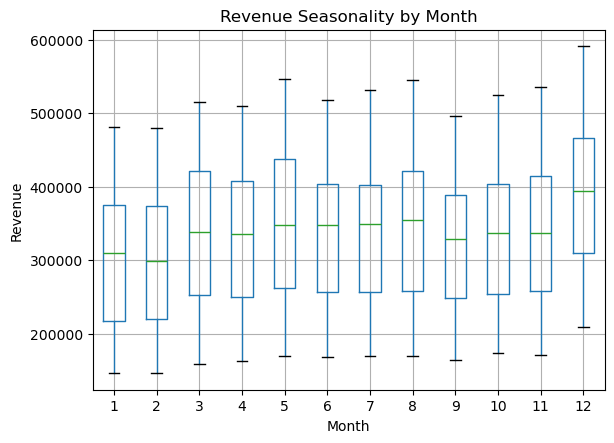

In [14]:
plt.figure(figsize=(12,5))
df.boxplot(column="Revenue", by="Month")
plt.title("Revenue Seasonality by Month")
plt.suptitle("")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


In [15]:
df["YoY_Growth"] = df["Revenue"].pct_change(12) * 100


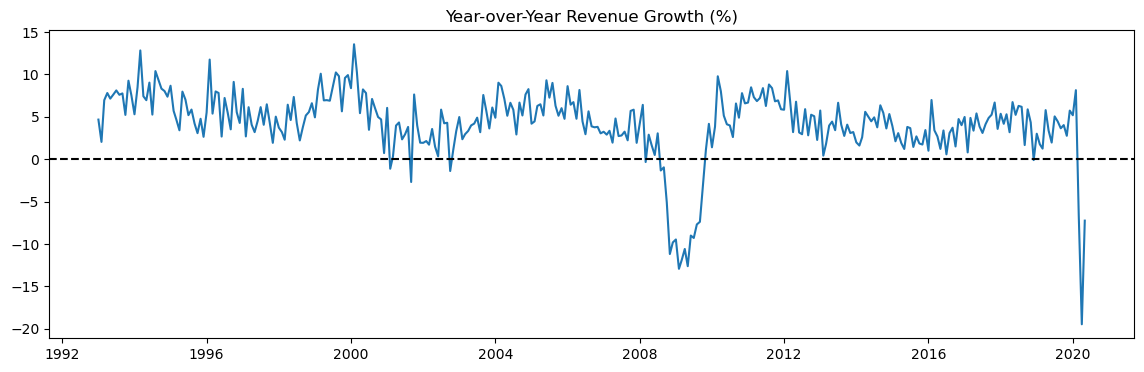

In [16]:
plt.figure(figsize=(14,4))
plt.plot(df["Date"], df["YoY_Growth"])
plt.axhline(0, color="black", linestyle="--")
plt.title("Year-over-Year Revenue Growth (%)")
plt.show()


#### Outlier Inspection

In [17]:
df["Revenue"].describe()


count       341.000000
mean     334869.513196
std      103322.071816
min      146376.000000
25%      250580.000000
50%      336134.000000
75%      414714.000000
max      591380.000000
Name: Revenue, dtype: float64

#### Revenue growth experienced a significant negative shock during the 2008 financial crisis, indicating a structural break that must be accounted for in forecasting

### EDA Summary:
The revenue time series exhibits a strong long-term upward trend with moderate annual seasonality. Year-over-year growth remains positive and stable during normal periods, with clear structural breaks during macroeconomic shocks such as the 2008 financial crisis and the COVID-19 pandemic. Extreme values represent real economic events and were retained to preserve forecasting realism.